In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-classification/UniversalBank.csv


### **Importing the libraries**

In [19]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/kaggle/input/bank-loan-classification/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.drop(['ID','ZIP Code'], axis = 1, inplace = True)

In [6]:
cols = ['Family','Education', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']

df = pd.get_dummies(df, columns = cols,drop_first = True)

In [7]:
y = df.loc[:,['Personal Loan']]
X = df.drop('Personal Loan', axis =1)

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [8]:
scaler = StandardScaler()
scaler.fit(train_x)
scaler.transform(train_x)
scaler.transform(test_x)

array([[-1.31456446, -1.3808012 , -0.84427747, ..., -0.2532849 ,
        -1.2189321 ,  1.53483051],
       [ 0.16666999,  0.27480588,  1.65020001, ..., -0.2532849 ,
        -1.2189321 ,  1.53483051],
       [-1.31456446, -1.29366398,  1.03752133, ..., -0.2532849 ,
         0.82039024, -0.65153774],
       ...,
       [-0.18185576, -0.16088019,  0.64365646, ..., -0.2532849 ,
         0.82039024,  1.53483051],
       [-0.44325007, -0.33515462, -0.51605675, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [-0.2689872 , -0.33515462,  2.56921802, ...,  3.94812332,
         0.82039024, -0.65153774]])

### **Modelling with KNeighbors Classifier**

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
cross_val = cross_val_score(knn_classifier,train_x,train_y, cv = 10)
print('Cross Val Score: {}%'.format(round(cross_val.mean()*100,2)))

Cross Val Score: 89.0%


Text(0, 0.5, 'Error rate')

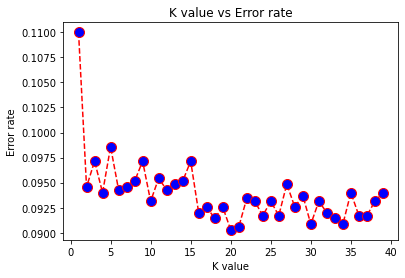

In [13]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,train_x,train_y, cv = 10)
    error_rate.append(1 - score.mean())
    
plt.plot(range(1,40), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('K value vs Error rate')
plt.xlabel('K value')
plt.ylabel('Error rate')

In [17]:
knn1 = KNeighborsClassifier(n_neighbors = 21)
cross_val = cross_val_score(knn1, train_x, train_y,cv = 10)
print('Cross Val Score: {}%'.format(round(cross_val.mean()*100,2)))

Cross Val Score: 90.94%


### **Grid-search CV using KNeighbors Classifier**

In [29]:
k_range = list(range(1,40))
weight_options = ["uniform","distance"]
param_grid = {'n_neighbors' : k_range, 'weights' : weight_options}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,param_grid,cv = 8)
grid.fit(train_x,train_y)
print(grid.best_score_)
print(grid.best_params_)

0.912857355568791
{'n_neighbors': 24, 'weights': 'uniform'}


In [28]:
knn1 = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform')
cross_val = cross_val_score(knn1, train_x, train_y,cv = 10)
print('Cross Val Score: {}%'.format(round(cross_val.mean()*100,2)))

Cross Val Score: 90.97%
